In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

Matplotlib is building the font cache; this may take a moment.


In [2]:
import pandas as pd

dataTrain = pd.read_csv('noof22.csv')

dataTrain.head()

,POSTED_BY,Under.con,rera,BHK.NO,BHK.OR.RK,SQUARE,READY.TO.MOVE,REASALE,ADDRESS,LONGITUDE,LATITUDE,price
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [3]:
type(dataTrain) 

pandas.core.frame.DataFrame

In [4]:
dataTrain.shape

(29451, 12)

In [5]:
dataTrain.isnull().sum()

POSTED_BY        0
Under.con        0
rera             0
BHK.NO           0
BHK.OR.RK        0
SQUARE           0
READY.TO.MOVE    0
REASALE          0
ADDRESS          0
LONGITUDE        0
LATITUDE         0
price            0
dtype: int64

In [9]:
dataTrain = dataTrain.dropna()

In [7]:
dataTrain.shape

(29451, 12)

In [8]:
dataTrain.dtypes

POSTED_BY         object
Under.con          int64
rera               int64
BHK.NO             int64
BHK.OR.RK         object
SQUARE           float64
READY.TO.MOVE      int64
REASALE            int64
ADDRESS           object
LONGITUDE        float64
LATITUDE         float64
price            float64
dtype: object

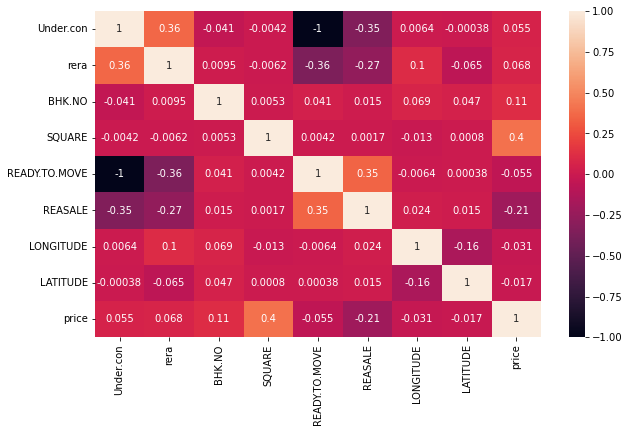

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
corr = dataTrain.corr()
##This is a pandas DataFrame method that is used to calculate the correlation between variables in the DataFrame.
sns.heatmap(corr,annot=True)
plt.show()

In [11]:
 dataTrain.describe()

,Under.con,rera,BHK.NO,SQUARE,READY.TO.MOVE,REASALE,LONGITUDE,LATITUDE,price
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [12]:
dataTrain.loc[dataTrain['price'] == 1, 'price'] = 500

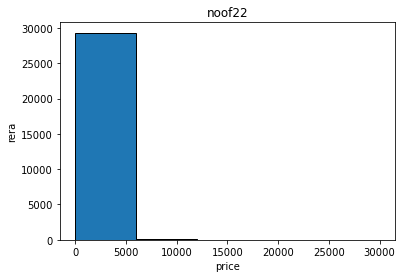

In [15]:
import matplotlib.pyplot as plt

dataTrain['price'].plot(kind = 'hist', bins = 5, edgecolor='black')   # 5 bins are used
plt.xlabel('price')
plt.ylabel('rera')
plt.title('noof22')
plt.show()

In [16]:
dataTrain.describe(include = 'object')

,POSTED_BY,BHK.OR.RK,ADDRESS
count,29451,29451,29451
unique,3,2,6899
top,Dealer,BHK,"Zirakpur,Chandigarh"
freq,18291,29427,509


<AxesSubplot:xlabel='Under.con', ylabel='price'>

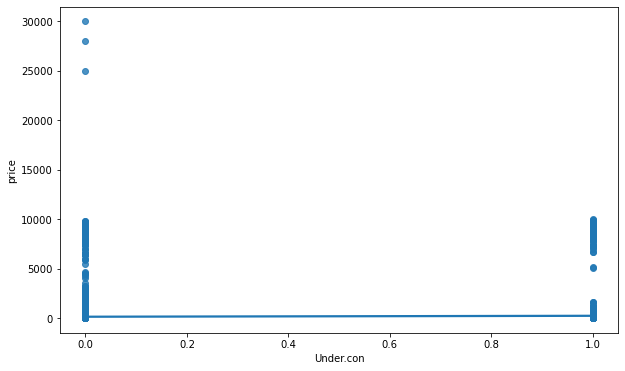

In [17]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.regplot(x="Under.con", y="price", data=dataTrain)

In [18]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['Under.con'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.05538701184510724  with a P-value of P = 1.8698489313918805e-21


<AxesSubplot:xlabel='rera', ylabel='price'>

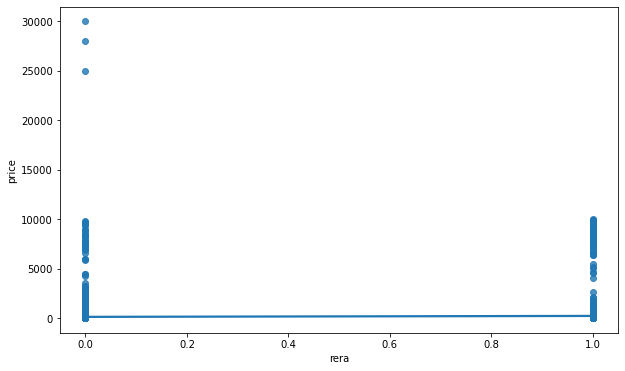

In [19]:
plt.figure(figsize=(10,6))
sns.regplot(x="rera", y="price", data=dataTrain)

In [20]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['rera'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.06767379093502571  with a P-value of P = 3.0211515403147706e-31


<AxesSubplot:xlabel='BHK.NO', ylabel='price'>

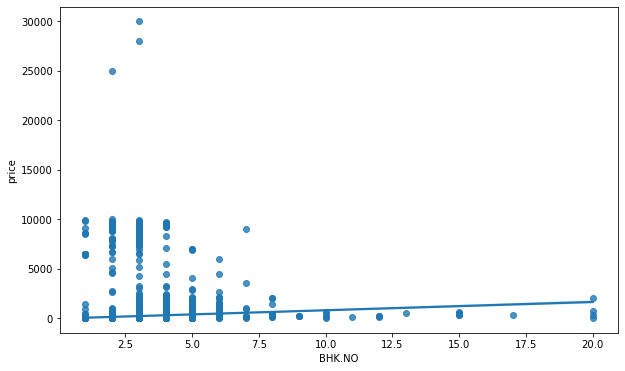

In [21]:
plt.figure(figsize=(10,6))
sns.regplot(x="BHK.NO", y="price", data=dataTrain)

In [22]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['BHK.NO'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.11230002746624378  with a P-value of P = 2.8622235778882835e-83


<AxesSubplot:xlabel='SQUARE', ylabel='price'>

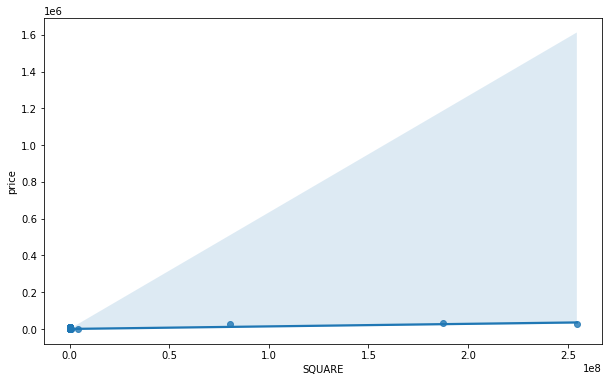

In [23]:
plt.figure(figsize=(10,6))
sns.regplot(x="SQUARE", y="price", data=dataTrain)

In [24]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['SQUARE'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.40268268646781286  with a P-value of P = 0.0


<AxesSubplot:xlabel='READY.TO.MOVE', ylabel='price'>

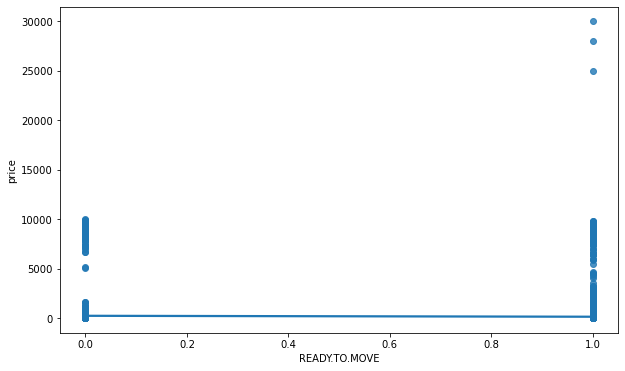

In [25]:
plt.figure(figsize=(10,6))
sns.regplot(x="READY.TO.MOVE", y="price", data=dataTrain)

In [26]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['READY.TO.MOVE'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.05538701184510725  with a P-value of P = 1.8698489313918805e-21


<AxesSubplot:xlabel='REASALE', ylabel='price'>

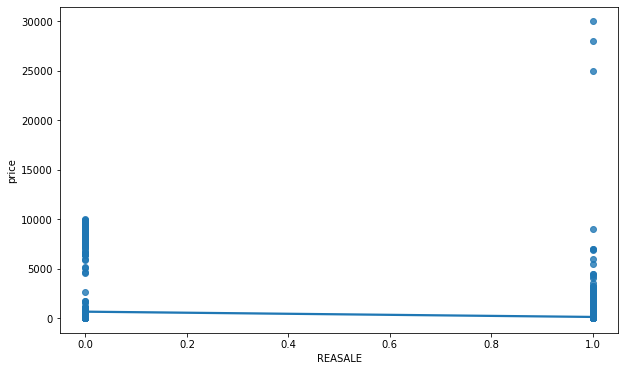

In [27]:
plt.figure(figsize=(10,6))
sns.regplot(x="REASALE", y="price", data=dataTrain)

In [28]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['REASALE'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.20737027736119448  with a P-value of P = 1.8702703665616094e-283


<AxesSubplot:xlabel='LONGITUDE', ylabel='price'>

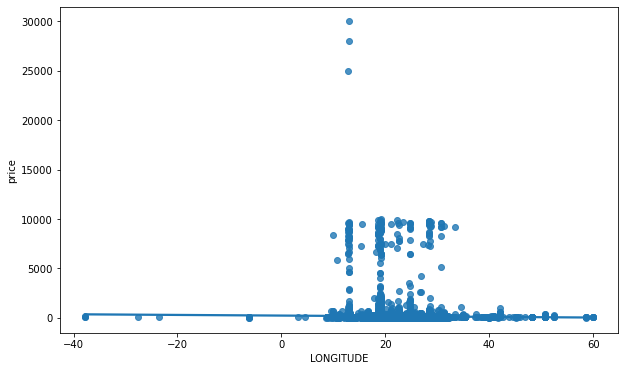

In [29]:
plt.figure(figsize=(10,6))
sns.regplot(x="LONGITUDE", y="price", data=dataTrain)

In [30]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['LONGITUDE'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.031107889948662964  with a P-value of P = 9.316117551452799e-08


<AxesSubplot:xlabel='LATITUDE', ylabel='price'>

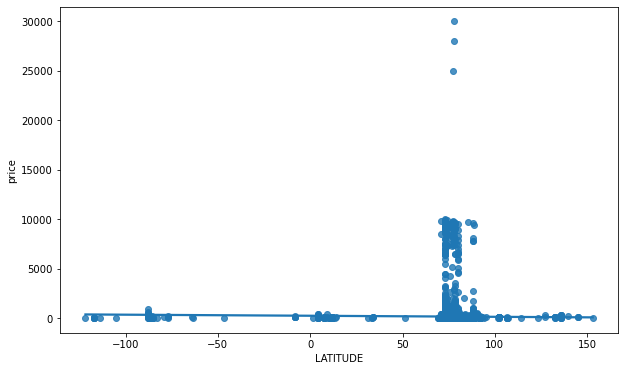

In [31]:
plt.figure(figsize=(10,6))
sns.regplot(x="LATITUDE", y="price", data=dataTrain)

In [32]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['LATITUDE'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.017262694784315816  with a P-value of P = 0.0030505593525898805


<AxesSubplot:xlabel='price', ylabel='price'>

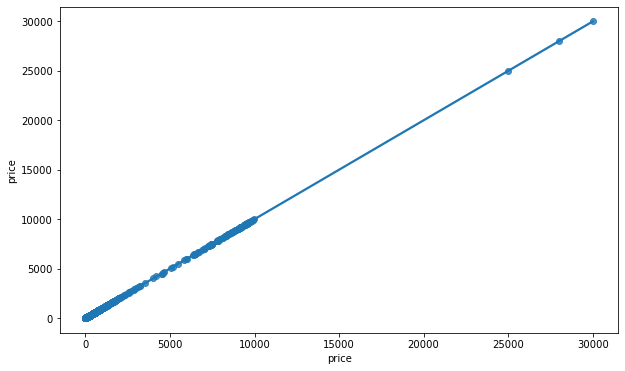

In [33]:
plt.figure(figsize=(10,6))
sns.regplot(x="price", y="price", data=dataTrain)

In [34]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['price'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9999999999999998  with a P-value of P = 0.0


In [47]:
 dataTrain

,POSTED_BY,Under.con,rera,BHK.OR.RK,SQUARE,READY.TO.MOVE,REASALE,ADDRESS,LONGITUDE,LATITUDE,price
0,Owner,0,0,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


<AxesSubplot:xlabel='POSTED_BY', ylabel='price'>

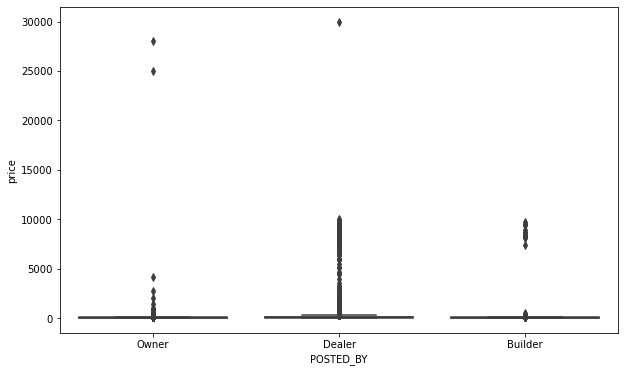

In [46]:
plt.figure(figsize=(10,6))
sns.boxplot(x="POSTED_BY", y="price", data=dataTrain)

<AxesSubplot:xlabel='BHK.OR.RK', ylabel='price'>

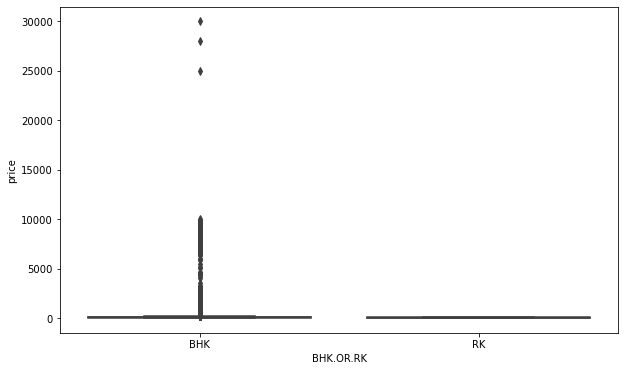

In [48]:
plt.figure(figsize=(10,6))
sns.boxplot(x="BHK.OR.RK", y="price", data=dataTrain)

In [74]:
plt.figure(figsize=(10,6))
sns.boxplot(x="ADDRESS", y="price", data=dataTrain)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001C9D2BB9430> (for post_execute):


KeyboardInterrupt: 

In [52]:
dataTrain.shape

(29451, 11)

In [58]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
dataTrain.POSTED_BY = labelencoder.fit_transform(dataTrain.POSTED_BY)
dataTrain.ADDRESS = labelencoder.fit_transform(dataTrain.ADDRESS)

In [53]:
dataTrain.head(10)

,POSTED_BY,Under.con,rera,BHK.OR.RK,SQUARE,READY.TO.MOVE,REASALE,ADDRESS,LONGITUDE,LATITUDE,price
0,2,0,0,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,1,0,0,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,2,0,0,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,2,0,1,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,1,1,0,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
5,2,0,0,BHK,1250.000000,1,1,"South Chittoor,Kochi",10.033280,76.282571,42.0
6,1,0,0,BHK,1495.053957,1,1,"Sodala,Jaipur",26.916347,75.795600,66.5
7,2,0,1,BHK,1181.012946,1,1,"Kharar,Mohali",30.740000,76.650000,52.0
8,1,0,1,BHK,1040.000000,1,1,"Bileshivale,Bangalore",13.054202,77.674002,41.6
9,2,0,1,BHK,879.120879,1,1,"Chromepet,Chennai",12.951610,80.140970,36.0


In [ ]:
# Calculate the z-score from with scipy
import scipy.stats as stats
dataTrain = stats.zscore(dataTrain)

In [61]:
dataTrain

,POSTED_BY,Under.con,rera,BHK.OR.RK,SQUARE,READY.TO.MOVE,REASALE,ADDRESS,LONGITUDE,LATITUDE,price
0,2,0,0,BHK,1300.236407,1,1,2844,12.969910,77.597960,55.0
1,1,0,0,BHK,1275.000000,1,1,6576,12.274538,76.644605,51.0
2,2,0,0,BHK,933.159722,1,1,2256,12.778033,77.632191,43.0
3,2,0,1,BHK,929.921143,1,1,5095,28.642300,77.344500,62.5
4,1,1,0,BHK,999.009247,0,1,3830,22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...
29446,2,0,0,BHK,2500.000000,1,1,5594,27.140626,78.043277,45.0
29447,2,0,0,BHK,769.230769,1,1,1510,39.945409,-86.150721,16.0
29448,1,0,0,BHK,1022.641509,1,1,150,26.928785,75.828002,27.1
29449,2,0,0,BHK,927.079009,1,1,5707,12.900150,80.227910,67.0


In [76]:
x_train=dataTrain.iloc[:,0:9]
y_train=dataTrain.iloc[:,11]

IndexError: single positional indexer is out-of-bounds

In [66]:
#In case you have no separate testing data, use the following code
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.3, random_state = 0)
#30% of the trainng data will be used for testing

NameError: name 'y_train' is not defined

In [67]:
x_train.head()

,POSTED_BY,Under.con,rera,BHK.OR.RK,SQUARE,READY.TO.MOVE,REASALE,ADDRESS,LONGITUDE,LATITUDE,price
0,2,0,0,BHK,1300.236407,1,1,2844,12.969910,77.597960,55.0
1,1,0,0,BHK,1275.000000,1,1,6576,12.274538,76.644605,51.0
2,2,0,0,BHK,933.159722,1,1,2256,12.778033,77.632191,43.0
3,2,0,1,BHK,929.921143,1,1,5095,28.642300,77.344500,62.5
4,1,1,0,BHK,999.009247,0,1,3830,22.592200,88.484911,60.5


In [68]:
y_train.head()

NameError: name 'y_train' is not defined

In [69]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model_mlr = model.fit(x_train,y_train)

NameError: name 'y_train' is not defined

In [70]:
y_pred1 = model_mlr.predict(x_test)

NameError: name 'model_mlr' is not defined

In [71]:
y_test[0]

NameError: name 'y_test' is not defined

In [72]:
y_pred1[0]

NameError: name 'y_pred1' is not defined

In [73]:
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,7))
sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('Mean Absolute Error', size=20)

plt.show()

NameError: name 'mae' is not defined